# Renyi entropija v odvisnoti od števila stolpcev

<font size="4">Kot primer bomo vzeli normalno porazdelitev. Zanima nas, koliko stolpcev moramo vzeti, da bo renyi entropija čim bližje vrednosti točne entropije. Najprej generirajmo normalno porazdelitev in ji priredimo gostoto verjetnosti.

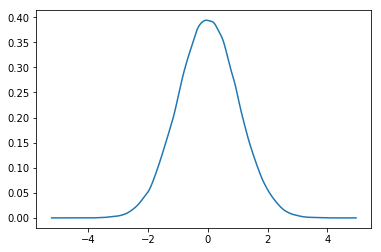

In [2]:
import random
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)

gauss_data = []
for i in range(100000):
    gauss_data.append(random.gauss(0,1))

pdf = gaussian_kde(gauss_data)

#izris porazdeltve
x = np.linspace(min(gauss_data)-1,max(gauss_data)+1,1000)
plt.plot(x,pdf(x))

plt.show()

<font size="4">Izračunajmo entropijo glede na pdf in entropijo glede na histogram z $n$ stolpci (npr. pri redu $\alpha=2$). Nato izrišimo graf točne entropije in graf entropije glede na histogram z $n$ stolpci.

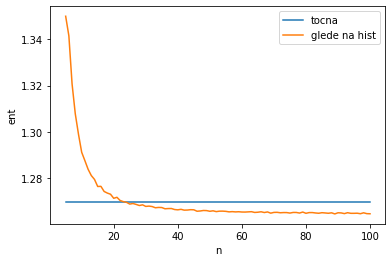

In [2]:
from renyi import renyi_entropy_cont,renyi_hist_entropy

red = 2

tocna_ent = renyi_entropy_cont(pdf, red, min(gauss_data)-1, max(gauss_data)-1)

# entropije glede na histogram z n stolpci, n=5,...,100
ent_hist = []

n = range(5,101)

for i in n:
    y,x = np.histogram(gauss_data, bins=i, density=1)
    ent_hist.append(renyi_hist_entropy(x,y,red))
    
tocna_ent_izris = [tocna_ent for _ in n]

plt.plot(n,tocna_ent_izris,label="tocna")
plt.plot(n,ent_hist, label="glede na hist")
plt.xlabel("n")
plt.ylabel("ent")
plt.legend()
plt.show()

<font size=4>Poglejmo si **razliko** med točno entropijo in entropijo glede na histogram v odvisnosti od $n$.

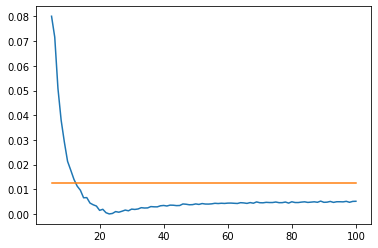

In [5]:
razlika = [abs(eh-tocna_ent) for eh in ent_hist]

plt.plot(n,razlika)

# meja sprejemljivosti
meja = 0.01*tocna_ent
plt.plot(n,[meja for _ in n])

plt.show()

<font size=4>Zdaj bomo naredili naslednje: glede na število podatkov bomo pogledali, kakšno je optimalno število stolpcev glede na entropijo histogramov zgoraj (upoštevamo mejo sprejemljivosti), in primerjali to optimalno število z ostalimi metodami za optimalno število stolpcev.

In [6]:
from optimalBinNumber import optBinNum

data_length1 = [10**i for i in range(3,7)]
data_length2 = [5*10**i for i in range(2,6)]
data_length = sorted(data_length1 + data_length2)


print(data_length)

red = 2

ugodna_zgornja = []
ugodna_spodnja = []
razlika_0 = []

sqrt = []
scott = []
rice = []
sturges = []
fd = []
doane = []


za_pdf = []
for _ in range(max(data_length)):
    za_pdf.append(random.gauss(0,1))
    
pdf = gaussian_kde(za_pdf)
tocna_ent = renyi_entropy_cont(pdf, red)


for N in data_length:
    print(N)
    random.seed(0)
    
    if N != max(data_length):
        data = []
        for i in range(N):
            data.append(random.gauss(0,1))
    else:
        data = za_pdf
    
    # entropije glede na histogram z n stolpci, n=5,...,100
    ent_hist = []

    n = range(8,1000)

    for i in n:
        y,x = np.histogram(data, bins=i, density=1)
        ent_hist.append(renyi_hist_entropy(x,y,red))
        
    razlika = [abs(eh-tocna_ent) for eh in ent_hist]
    meja = 0.005*tocna_ent
    
    ugodni_n = []
    for i in range(len(razlika)):
        if razlika[i]<=meja:
            ugodni_n.append(i+5)
        if razlika[i]==min(razlika):
            razlika_0.append(i+5)
    try:
        ugodna_zgornja.append(max(ugodni_n))
    except:pass
    try:
        ugodna_spodnja.append(min(ugodni_n))
    except:pass
    
    sqrt.append(optBinNum(data,"sqrt"))
    scott.append(optBinNum(data))
    rice.append(optBinNum(data,"rice"))
    sturges.append(optBinNum(data,"sturges"))
    fd.append(optBinNum(data,"fd"))
    doane.append(optBinNum(data,"doane"))


[500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000]
500
1000
5000
10000
50000
100000
500000
1000000


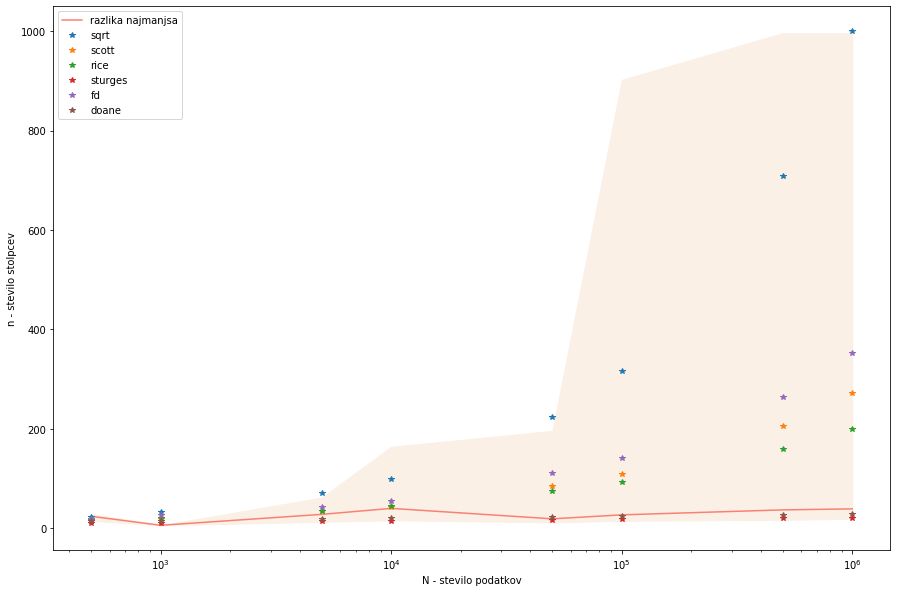

In [7]:
plt.figure(figsize=(15,10))

plt.xscale("log")

plt.fill_between(data_length, ugodna_spodnja, ugodna_zgornja,color="linen")

plt.plot(data_length,razlika_0, color="salmon",label="razlika najmanjsa")


plt.plot(data_length, sqrt, "*", label="sqrt")
plt.plot(data_length, scott, "*", label="scott")
plt.plot(data_length, rice, "*", label="rice")
plt.plot(data_length, sturges, "*", label="sturges")
plt.plot(data_length, fd, "*", label="fd")
plt.plot(data_length, doane, "*", label="doane")

plt.xlabel("N - stevilo podatkov")
plt.ylabel("n - stevilo stolpcev")

plt.legend()

plt.show()

<font size=4>Obarvano območje je območje sprejemljivosti števila stolpcev glede na razliko med entropijama. Opazimo, da so vse metode znotraj obarvanega območja, kar je presenetljivo, še posebej pri naivnih metodah (rice, sqrt, sturges, ki upoštevajo le število podatkov).
    
Iz območja sprejemljivosti števila stolpcev pa je razvidno tudi, da lahko ne glede na število podatkov vzamemo manj kot 50 stolpcev.

<font size=4>Zdaj bomo naredili naslednje: definirali bomo točno normalno porazdelitev in izračunali njeno entropijo. Nato bomo za število podatkov $N$ izračunali optimalno število stolpcev $n$ naše normalne porazdelitve (glede na metode) in izračunali entropijo glede na histogram s takšnim številom stolpcev. Nato bomo pogledali, kakšna je relativna napaka med točno entropijo in histogramom glede na začetno število podatkov (pri določeni metodi).

In [1]:
from GMM import norm
from optimalBinNumber import optBinNum
# import texttable
import matplotlib.pyplot as plt
from renyi import renyi_entropy_cont, renyi_hist_entropy
import random
import numpy as np
import sys, os
import time

# # Disable print
# def blockPrint():
#     old_stdout = sys.stdout
#     sys.stdout = open(os.devnull, 'w')
#     return old_stdout

# # enable print
# def enablePrint(a):
#     sys.stdout = a

zacetek = time.time()

red = 0.5

p = lambda x: norm(x,0,1)

tocna_ent = renyi_entropy_cont(p,red)

print("tocna izracunana")

data_length1 = [10**i for i in range(3,7)]
data_length2 = [5*10**i for i in range(3,6)]
# data_length3 = [4*10**i for i in range(3,7)]
# data_length4 = [6*10**i for i in range(3,7)]
# data_length5 = [8*10**i for i in range(3,7)]
data_length = sorted(data_length1 + data_length2)  # + data_length3 + data_length4 + data_length5)

# # za izris tabele
header = ["N", "sqrt", "scott", "rice", "sturges", "fd", "doane", "kl"]
rows = [header]

sqrt_raz = []
scott_raz = []
rice_raz = []
sturges_raz = []
fd_raz = []
doane_raz = []
kl_raz = []


for i in data_length:
    print(i)
    optimalno = [i]
    data = []
    for _ in range(i):
        data.append(random.gauss(0,1))
    entropije={}
    
    # sqrt
    opt = optBinNum(data,"sqrt")
    if opt not in entropije:
        y,x = np.histogram(data, bins=opt, density=1)
        entropije[opt] = renyi_hist_entropy(x,y,red)
    razlika = abs(tocna_ent - entropije[opt])/tocna_ent
    sqrt_raz.append(razlika)
    optimalno.append(opt)
    
    # scott
    opt = optBinNum(data,"scott")
    if opt not in entropije:
        y,x = np.histogram(data, bins=opt, density=1)
        entropije[opt] = renyi_hist_entropy(x,y,red)
    razlika = abs(tocna_ent - entropije[opt])/tocna_ent
    scott_raz.append(razlika)
    optimalno.append(opt)
    
    # rice
    opt = optBinNum(data,"rice")
    if opt not in entropije:
        y,x = np.histogram(data, bins=opt, density=1)
        entropije[opt] = renyi_hist_entropy(x,y,red)
    razlika = abs(tocna_ent - entropije[opt])/tocna_ent
    rice_raz.append(razlika)
    optimalno.append(opt)
    
    # sturges
    opt = optBinNum(data,"sturges")
    if opt not in entropije:
        y,x = np.histogram(data, bins=opt, density=1)
        entropije[opt] = renyi_hist_entropy(x,y,red)
    razlika = abs(tocna_ent - entropije[opt])/tocna_ent
    sturges_raz.append(razlika)
    optimalno.append(opt)
    
    # fd
    opt = optBinNum(data,"fd")
    if opt not in entropije:
        y,x = np.histogram(data, bins=opt, density=1)
        entropije[opt] = renyi_hist_entropy(x,y,red)
    razlika = abs(tocna_ent - entropije[opt])/tocna_ent
    fd_raz.append(razlika)
    optimalno.append(opt)
    
    # doane
    opt = optBinNum(data,"doane")
    if opt not in entropije:
        y,x = np.histogram(data, bins=opt, density=1)
        entropije[opt] = renyi_hist_entropy(x,y,red)
    razlika = abs(tocna_ent - entropije[opt])/tocna_ent
    doane_raz.append(razlika)
    optimalno.append(opt)
    
    # kl
#     block = blockPrint()
    opt = optBinNum(data,"kl", n_z=10, n_k=300)
#     enablePrint(block)
    if opt not in entropije:
        y,x = np.histogram(data, bins=opt, density=1)
        entropije[opt] = renyi_hist_entropy(x,y,red)
    razlika = abs(tocna_ent - entropije[opt])/tocna_ent
    kl_raz.append(razlika)
    optimalno.append(opt)

    rows.append(optimalno)
    print("\n", i, "done\n")
    
with open("save.txt", 'w') as dat:
    dat.write(str(rows))

with open("razlike.txt", 'w') as dat:
    dat.write(str(sqrt_raz)+ "\n")
    dat.write(str(scott_raz)+ "\n")
    dat.write(str(rice_raz)+ "\n")
    dat.write(str(sturges_raz)+ "\n")
    dat.write(str(fd_raz)+ "\n")
    dat.write(str(doane_raz)+ "\n")
    dat.write(str(kl_raz))
    
konec = time.time()
print(konec-zacetek)

tocna izracunana
1000
iskanje od 10 do 300:
10,

/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/optimalBinNumber.py:69: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return scipy.integrate.quad(integrand, a, b)[0]


11,12,13,

/Users/aljazostrez/Documents/GitHub/Renyi-entropy-and-divergence/optimalBinNumber.py:69: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return scipy.integrate.quad(integrand, a, b)[0]


14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,28

<font size=4>Za ta izračun smo porabili 113842.9 sekund, kar je približno 31 ur in 40 minut. Rezultate smo si shranili v datoteke. Odprimo te datoteke in uvozimo rezultate.

In [1]:
import ast

with open("save.txt", 'r') as dat:
    rows = ast.literal_eval(dat.readline())

data_length = [rows[i][0] for i in range(1,len(rows))]

with open("razlike.txt", 'r') as dat:
    sqrt_raz = ast.literal_eval(dat.readline())
    scott_raz = ast.literal_eval(dat.readline())
    rice_raz = ast.literal_eval(dat.readline())
    sturges_raz = ast.literal_eval(dat.readline())
    fd_raz = ast.literal_eval(dat.readline())
    doane_raz = ast.literal_eval(dat.readline())
    kl_raz = ast.literal_eval(dat.readline())

<font size=4>Poglejmo, kakšno je optimalno število stolpcev glede na metode in število podatkov.

In [2]:
def print_table(table):
    longest_cols = [
        (max([len(str(row[i])) for row in table]) + 3)
        for i in range(len(table[0]))
    ]
    row_format = "".join(["{:>" + str(longest_col) + "}" for longest_col in longest_cols])
    for row in table:
        print(row_format.format(*row))

print_table(rows)

         N   sqrt   scott   rice   sturges    fd   doane    kl
      1000     32      19     20        11    24      15    15
      5000     71      38     35        14    49      19    47
     10000    100      44     44        15    56      20    51
     50000    224      84     74        17   109      23   125
    100000    317     120     93        18   155      24   134
    500000    708     211    159        20   273      27   222
   1000000   1000     273    200        21   353      29    74


<font size=4>Naredimo izris relativne napake entropije glede na število stolpcev, izračunano po zgornjih metodah.

In [6]:
N = []
sqrt = []
scott = []
rice = []
sturges = []
fd = []
kl = []

for r in rows:
    if type(r[0]) == str:
        continue
    N.append(r[0])
    sqrt.append(r[1])
    scott.append(r[2])
    rice.append(r[3])
    sturges.append(r[4])
    fd.append(r[5])
    kl.append(r[7])

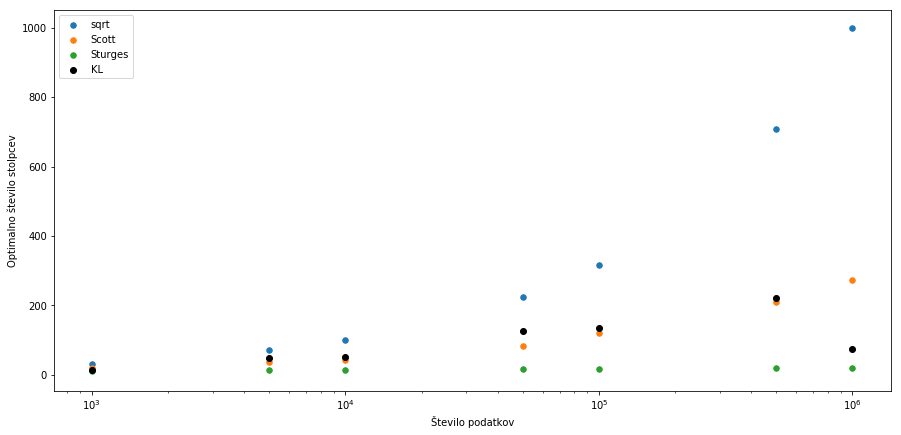

In [24]:
import matplotlib.pyplot as plt

a = 30

plt.figure(figsize=(15,7))
plt.scatter(N,sqrt,label="sqrt",s=a)
plt.scatter(N,scott,label="Scott",s=a)
# plt.scatter(N,rice,label="rice",s=a)
plt.scatter(N,sturges,label="Sturges",s=a)
# plt.scatter(N,fd,label="fd",s=a)
plt.scatter(N,kl,label="KL", color="black")
plt.xscale("log")
plt.xlabel("Število podatkov")
plt.ylabel("Optimalno število stolpcev")
plt.legend()
plt.show()

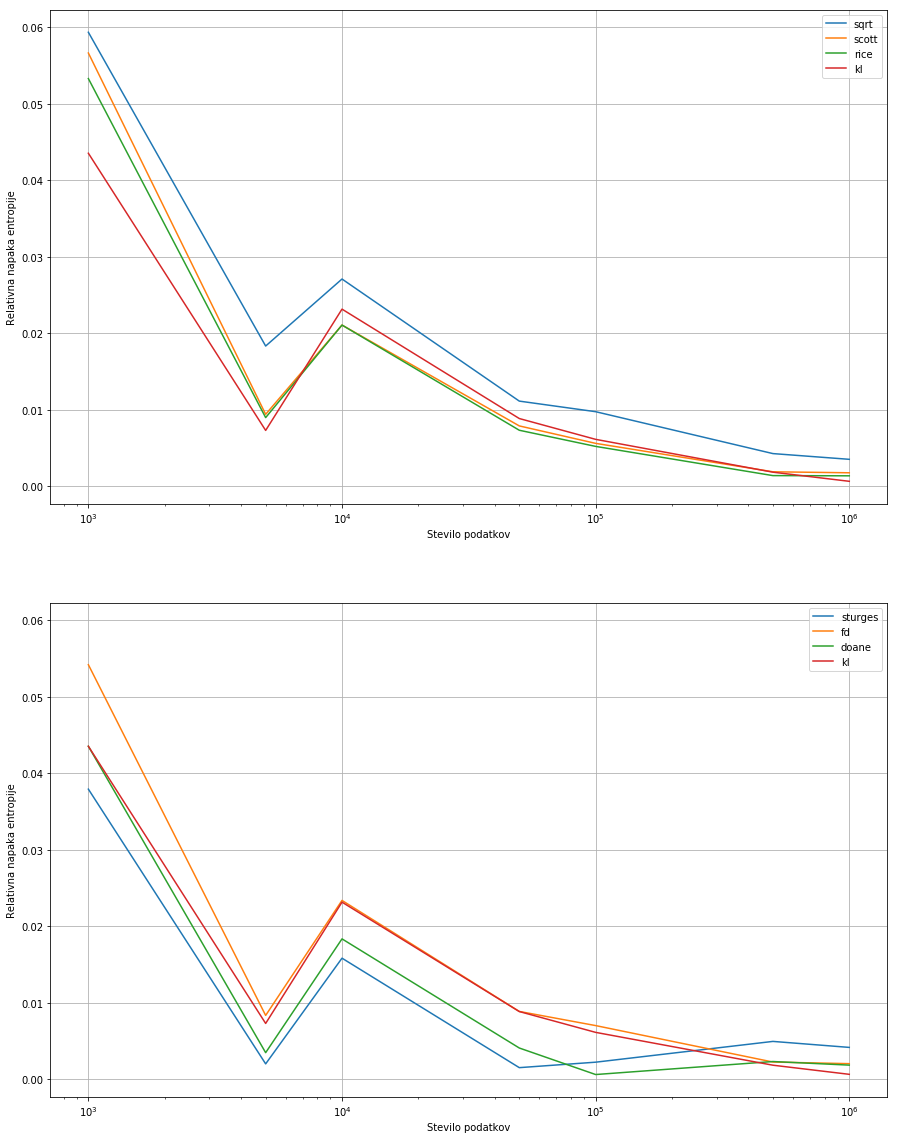

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,20))

x = data_length


ax1 = plt.subplot(211)
plt.plot(x,sqrt_raz,label="sqrt")
plt.plot(x,scott_raz,label="scott")
plt.plot(x,rice_raz,label="rice")
plt.plot(x,kl_raz,label="kl")
plt.xscale("log")
plt.legend()
plt.grid()
plt.xlabel("Stevilo podatkov")
plt.ylabel("Relativna napaka entropije")

plt.subplot(212, sharey=ax1)
plt.plot(x,sturges_raz,label="sturges")
plt.plot(x,fd_raz,label="fd")
plt.plot(x,doane_raz,label="doane")
plt.plot(x,kl_raz,label="kl")
plt.xscale("log")
plt.legend()
plt.grid()
plt.xlabel("Stevilo podatkov")
plt.ylabel("Relativna napaka entropije")

plt.show()

<font size=4>Opazimo, da se relativna napaka zmanjšuje pri vseh metodah in konvergira proti 0. Zanimivo je, da je KL-metoda zelo uspešna, pri 1e6 podatkov pa je relativna napaka entropije pri KL-metodi celo najmanjša.
    
Sklepamo lahko, da KL ne le konkurira, vendar v nekaterih pogledih celo premaga ostale metode. Slaba stvar te metode pa je, da je izjemno počasna, sploh, ko je število podatkov zelo veliko.
